<a href="https://colab.research.google.com/github/LeandroMartins0/base_wine/blob/main/base_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas

In [1]:
!pip install yellowbrick

In [2]:
!pip install plotpy

     |████████████████████████████████| 6.0 MB 1.1 MB/s 
     |████████████████████████████████| 730 kB 45.6 MB/s 
     |████████████████████████████████| 2.8 MB 37.3 MB/s 
  Created wheel for plotpy: filename=plotpy-1.2.0-cp37-cp37m-linux_x86_64.whl size=7382266 sha256=1ac84b6688503e44dc0cf6b903ddd245fb1e2d357022eb43a04f09826d73bb31
  Stored in directory: /root/.cache/pip/wheels/cd/40/2a/df0b684e5f9309e48061909617ab9518787b5d87a6deb94e08
Successfully built plotpy
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires h5py>=2.9.0, but you have h5py 2.8.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [4]:
base_wine = pd.read_csv('/content/drive/MyDrive/Python Machine Learning/Wine Quality/winequality-white.csv', sep = ';')

# Estudo da base

In [5]:
base_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
base_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
base_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
base_wine.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

In [9]:
base_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
np.unique(base_wine['quality'], return_counts = True)

(array([3, 4, 5, 6, 7, 8, 9]),
 array([  20,  163, 1457, 2198,  880,  175,    5]))

# Gráficos

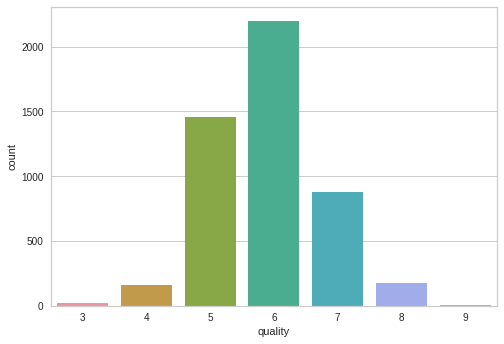

In [11]:
sns.countplot(x = base_wine['quality']);

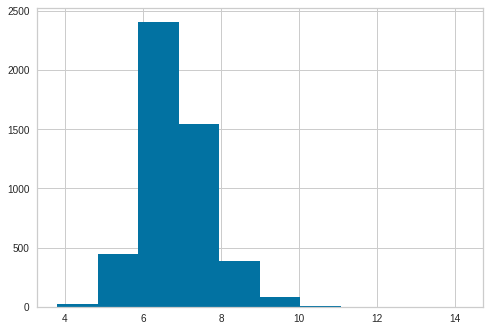

In [12]:
plt.hist(x = base_wine['fixed acidity']);

# Divisão de previsores e classes

In [13]:
base_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [14]:
# Previsores

X_wine = base_wine.iloc[:,0:11].values

In [15]:
X_wine

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [16]:
# Classe

Y_wine = base_wine.iloc[:,11].values 

In [17]:
Y_wine

array([6, 6, 6, ..., 6, 7, 6])

# Padronização de Valores

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler_wine = StandardScaler()
X_wine = scaler_wine.fit_transform(X_wine)

In [20]:
X_wine[0]

array([ 0.17209696, -0.0817699 ,  0.2132802 ,  2.82134917, -0.035355  ,
        0.56993158,  0.74456503,  2.33151201, -1.24692128, -0.34918426,
       -1.39315246])

# Divisão de base em treinamento e teste

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Usaremos 75% da base

X_wine_treinamento, X_wine_teste, Y_wine_treinamento, Y_wine_teste = train_test_split(X_wine, Y_wine, test_size = 0.15, random_state = 0)

In [23]:
# Registros para treinamento do algoritmo 

X_wine_treinamento.shape, Y_wine_treinamento.shape

((4163, 11), (4163,))

In [24]:
# Registros para teste do algoritmo

X_wine_teste.shape, Y_wine_teste.shape

((735, 11), (735,))

# Salvando variáveis

In [25]:
import pickle

In [26]:
with open('wine.pkl', 'wb') as f:
  pickle.dump([X_wine_treinamento, Y_wine_treinamento, X_wine_teste, Y_wine_teste], f)

In [27]:
with open('wine.pkl', 'rb') as f:
  X_wine_treinamento, Y_wine_treinamento, X_wine_teste, Y_wine_teste = pickle.load(f)

In [28]:
X_wine_treinamento.shape, Y_wine_treinamento.shape

((4163, 11), (4163,))

In [29]:
X_wine_teste.shape, Y_wine_teste.shape

((735, 11), (735,))

# Classificador Majority Learner

**Algoritmo para capturar a média de acertos para os demais algoritmos**

In [30]:
#!pip install orange3

In [31]:
#import Orange

In [32]:
#base_wine_regras = Orange.data.Table('/content/drive/MyDrive/Python Machine Learning/Wine Quality/winequality-white-regras-novo.xlsx')

In [33]:
#base_wine_regras

In [34]:
#base_wine_regras.domain

In [35]:
#majority = Orange.classification.MajorityLearner()
#previsoes = Orange.evaluation.testing.TestOnTestData(base_wine_regras, base_wine_regras, [majority])
#Orange.evaluation.CA(previsoes)

# Árvore de Decisão 57.41%

In [36]:
# Importando árvore

from sklearn.tree import DecisionTreeClassifier

In [37]:
# Carregando arquivo

with open('wine.pkl', 'rb') as f:
  X_wine_treinamento, Y_wine_treinamento, X_wine_teste, Y_wine_teste = pickle.load(f)

In [38]:
X_wine_treinamento.shape, Y_wine_treinamento.shape

((4163, 11), (4163,))

In [39]:
X_wine_teste.shape, Y_wine_teste.shape

((735, 11), (735,))

In [40]:
# Treinamento da árvore de decisão

arvore_wine = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore_wine.fit(X_wine_treinamento, Y_wine_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
# Previsões

previsoes = arvore_wine.predict(X_wine_teste)
previsoes

array([4, 6, 7, 5, 6, 5, 6, 7, 6, 6, 6, 7, 5, 6, 7, 6, 7, 6, 6, 6, 6, 6,
       5, 5, 7, 8, 6, 5, 6, 5, 5, 5, 6, 6, 5, 7, 7, 7, 7, 5, 5, 5, 5, 6,
       5, 6, 4, 7, 7, 6, 7, 6, 5, 6, 4, 7, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       5, 6, 6, 5, 6, 5, 5, 7, 7, 6, 7, 5, 5, 7, 6, 6, 7, 5, 6, 7, 6, 7,
       5, 6, 8, 7, 6, 8, 5, 5, 7, 6, 7, 6, 8, 5, 6, 6, 6, 6, 6, 6, 7, 5,
       5, 6, 7, 7, 7, 7, 5, 6, 7, 7, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6, 7, 6,
       7, 6, 7, 5, 6, 7, 5, 5, 5, 7, 6, 6, 7, 7, 6, 5, 6, 7, 6, 6, 7, 7,
       6, 5, 5, 6, 6, 7, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 6,
       5, 5, 6, 5, 6, 6, 6, 7, 8, 5, 6, 6, 5, 6, 3, 6, 6, 7, 6, 7, 6, 6,
       6, 6, 7, 6, 5, 8, 6, 5, 6, 6, 7, 5, 5, 8, 7, 6, 5, 8, 7, 6, 7, 7,
       6, 6, 6, 6, 6, 5, 6, 4, 6, 6, 6, 7, 6, 4, 5, 5, 5, 7, 6, 5, 5, 7,
       8, 5, 5, 7, 6, 5, 6, 6, 6, 7, 5, 6, 7, 5, 5, 5, 5, 6, 7, 6, 6, 6,
       5, 6, 6, 6, 7, 5, 6, 7, 5, 6, 5, 5, 7, 6, 6, 6, 6, 5, 5, 5, 6, 6,
       6, 6, 5, 7, 7, 7, 7, 7, 5, 6, 6, 5, 6, 7, 6,

In [42]:
# Comparação

Y_wine_teste

array([5, 6, 7, 8, 5, 4, 6, 5, 7, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 6, 7,
       6, 5, 7, 8, 5, 5, 7, 5, 5, 5, 7, 6, 5, 7, 7, 7, 7, 7, 5, 5, 5, 6,
       6, 6, 5, 7, 7, 6, 7, 6, 3, 6, 5, 7, 5, 6, 5, 6, 6, 6, 8, 6, 8, 6,
       5, 5, 6, 5, 7, 5, 5, 7, 6, 7, 6, 5, 5, 8, 4, 5, 6, 5, 6, 5, 6, 7,
       5, 6, 6, 6, 6, 8, 4, 5, 7, 7, 7, 6, 7, 4, 4, 6, 5, 7, 6, 6, 6, 5,
       5, 7, 7, 5, 7, 7, 4, 5, 8, 5, 5, 5, 6, 4, 5, 7, 5, 7, 5, 7, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 8, 6, 7, 5, 6, 8, 6, 7, 6, 6, 6, 7, 6, 7, 7,
       4, 5, 5, 6, 6, 7, 4, 6, 7, 7, 5, 6, 5, 6, 5, 7, 7, 7, 6, 7, 6, 6,
       5, 5, 6, 5, 6, 6, 8, 7, 6, 5, 5, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6,
       6, 6, 4, 6, 6, 7, 6, 5, 7, 5, 7, 6, 5, 8, 7, 7, 6, 8, 6, 6, 6, 7,
       6, 6, 7, 6, 6, 5, 5, 4, 6, 6, 5, 6, 7, 4, 5, 7, 6, 6, 6, 5, 6, 7,
       8, 6, 6, 7, 5, 5, 7, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 7, 7, 6, 6, 5,
       4, 6, 6, 6, 7, 6, 7, 7, 6, 6, 5, 5, 6, 7, 3, 7, 6, 4, 5, 5, 5, 6,
       5, 5, 4, 5, 7, 7, 7, 7, 5, 6, 5, 5, 6, 7, 5,

In [43]:
# Classes

arvore_wine.classes_

array([3, 4, 5, 6, 7, 8, 9])

In [44]:
# Accuracy

accuracy_score(Y_wine_teste, previsoes)

0.5741496598639456

0.5741496598639456

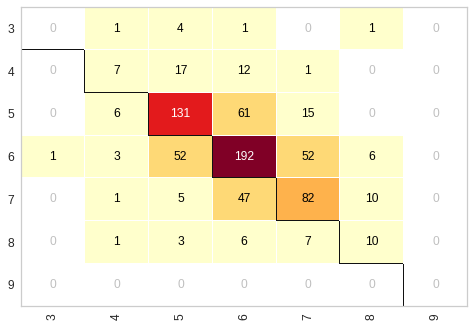

In [45]:
# Matrix de Confusão

cm = ConfusionMatrix(arvore_wine)
cm.fit(X_wine_treinamento, Y_wine_treinamento)
cm.score(X_wine_teste, Y_wine_teste)

# Random Forest 66.93%

In [46]:
# Importando Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Ler arquivo
with open('wine.pkl', 'rb') as f:
  X_wine_treinamento, Y_wine_treinamento, X_wine_teste, Y_wine_teste = pickle.load(f)

In [61]:
random_forest_wine = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
random_forest_wine.fit(X_wine_treinamento, Y_wine_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [62]:
previsoes = random_forest_wine.predict(X_wine_teste)
previsoes

array([5, 6, 6, 7, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 6, 6, 6, 5, 7, 6, 6, 6,
       6, 6, 7, 8, 5, 5, 6, 6, 5, 5, 6, 6, 5, 7, 7, 7, 7, 6, 5, 5, 5, 6,
       5, 6, 5, 7, 7, 6, 7, 6, 5, 6, 6, 7, 5, 6, 5, 6, 6, 5, 7, 6, 6, 6,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 7,
       6, 6, 6, 6, 6, 8, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 5,
       5, 6, 6, 6, 7, 7, 5, 5, 6, 5, 5, 6, 5, 5, 5, 7, 5, 6, 6, 7, 6, 6,
       7, 6, 6, 5, 6, 6, 5, 6, 6, 7, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 7,
       5, 6, 5, 6, 6, 7, 6, 6, 6, 7, 5, 6, 6, 6, 5, 5, 7, 7, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 8, 7, 6, 5, 8, 6, 6, 7, 7,
       6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 4, 5, 6, 6, 6, 6, 5, 5, 7,
       7, 6, 6, 7, 5, 5, 7, 6, 7, 6, 6, 6, 7, 5, 6, 6, 6, 7, 7, 6, 6, 6,
       5, 6, 6, 6, 5, 6, 6, 7, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6,
       6, 5, 5, 6, 6, 7, 7, 6, 5, 5, 6, 6, 6, 7, 6,

In [51]:
Y_wine_teste

array([5, 6, 7, 8, 5, 4, 6, 5, 7, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 6, 7,
       6, 5, 7, 8, 5, 5, 7, 5, 5, 5, 7, 6, 5, 7, 7, 7, 7, 7, 5, 5, 5, 6,
       6, 6, 5, 7, 7, 6, 7, 6, 3, 6, 5, 7, 5, 6, 5, 6, 6, 6, 8, 6, 8, 6,
       5, 5, 6, 5, 7, 5, 5, 7, 6, 7, 6, 5, 5, 8, 4, 5, 6, 5, 6, 5, 6, 7,
       5, 6, 6, 6, 6, 8, 4, 5, 7, 7, 7, 6, 7, 4, 4, 6, 5, 7, 6, 6, 6, 5,
       5, 7, 7, 5, 7, 7, 4, 5, 8, 5, 5, 5, 6, 4, 5, 7, 5, 7, 5, 7, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 8, 6, 7, 5, 6, 8, 6, 7, 6, 6, 6, 7, 6, 7, 7,
       4, 5, 5, 6, 6, 7, 4, 6, 7, 7, 5, 6, 5, 6, 5, 7, 7, 7, 6, 7, 6, 6,
       5, 5, 6, 5, 6, 6, 8, 7, 6, 5, 5, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6,
       6, 6, 4, 6, 6, 7, 6, 5, 7, 5, 7, 6, 5, 8, 7, 7, 6, 8, 6, 6, 6, 7,
       6, 6, 7, 6, 6, 5, 5, 4, 6, 6, 5, 6, 7, 4, 5, 7, 6, 6, 6, 5, 6, 7,
       8, 6, 6, 7, 5, 5, 7, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 7, 7, 6, 6, 5,
       4, 6, 6, 6, 7, 6, 7, 7, 6, 6, 5, 5, 6, 7, 3, 7, 6, 4, 5, 5, 5, 6,
       5, 5, 4, 5, 7, 7, 7, 7, 5, 6, 5, 5, 6, 7, 5,

In [63]:
accuracy_score(Y_wine_teste, previsoes)

0.6693877551020408

0.6693877551020408

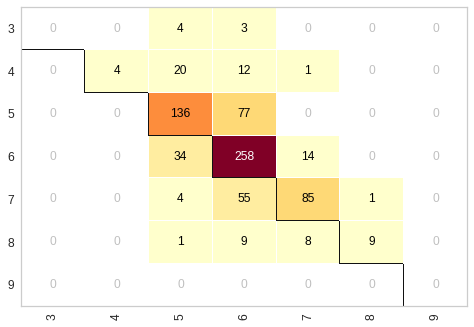

In [64]:
from yellowbrick.classifier import confusion_matrix
cm = ConfusionMatrix(random_forest_wine)
cm.fit(X_wine_treinamento, Y_wine_treinamento)
cm.score(X_wine_teste, Y_wine_teste)